# data information
State :All 51 states

Account Length : How long account has been active

Area Code : Code Number of Area

lntl Plan : International plan activated ( yes, no )

VMail Plan : Voice Mail plan activated ( yes ,no )

VMail Message : No.of voice mail messages

Day Mins : Total day minutes used

Day calls : Total day calls made

Day Charge : Total day charge

Eve Mins : Total evening minutes

Eve Calls : Total evening calls

Eve Charge : Total evening charge

Night Mins : Total night minutes

Night Calls : Total night calls

Night Charge : Total night charge

Intl Mins : Total International minutes used

Intl Calls : Total International calls made

Intl Charge : Total International charge

CustServ calls : Number of customer service calls made

Churn : Customer churn (Target Variable True=1, False=0)



In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv("/content/customer_churn_dataset.csv")
df.sample(5)

,Unnamed: 0,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1434,1434,CO,156,408,Yes,No,0,277.0,119,47.09,...,106,20.26,94.4,96,4.25,8.3,3,2.24,1,False
2333,2333,MS,78,408,No,No,0,108.6,108,18.46,...,126,17.84,222.6,117,10.02,7.9,5,2.13,1,True
2461,2461,IN,148,415,No,Yes,26,158.7,91,26.98,...,127,13.64,218.3,88,9.82,9.9,3,2.67,1,False
1606,1606,SD,108,415,No,No,0,240.2,78,40.83,...,109,19.58,217.0,83,9.76,5.2,1,1.40,2,False
677,677,AL,93,408,No,No,0,267.9,114,45.54,...,74,18.96,262.7,90,11.82,11.3,3,3.05,3,True


# EDA

In [57]:
df.shape

(2666, 21)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2666 non-null   int64  
 1   State                   2666 non-null   object 
 2   Account length          2666 non-null   int64  
 3   Area code               2666 non-null   int64  
 4   International plan      2666 non-null   object 
 5   Voice mail plan         2666 non-null   object 
 6   Number vmail messages   2666 non-null   int64  
 7   Total day minutes       2666 non-null   float64
 8   Total day calls         2666 non-null   int64  
 9   Total day charge        2666 non-null   float64
 10  Total eve minutes       2666 non-null   float64
 11  Total eve calls         2666 non-null   int64  
 12  Total eve charge        2666 non-null   float64
 13  Total night minutes     2666 non-null   float64
 14  Total night calls       2666 non-null   

In [59]:
df = df.drop(columns='Unnamed: 0',axis=1)

In [60]:
df.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
642,KY,75,415,No,No,0,314.6,102,53.48,169.8,86,14.43,285.1,100,12.83,5.7,3,1.54,2,True
1920,ND,56,510,No,No,0,164.3,92,27.93,233.7,107,19.86,187.3,104,8.43,11.8,1,3.19,2,False
2604,IL,57,415,No,Yes,30,179.2,105,30.46,283.2,83,24.07,228.1,77,10.26,14.7,5,3.97,1,False
2634,TN,110,415,No,No,0,227.7,88,38.71,170.0,96,14.45,128.7,57,5.79,11.7,5,3.16,1,False
2017,IN,168,415,No,No,0,183.2,131,31.14,179.2,73,15.23,292.8,100,13.18,9.9,5,2.67,2,False


In [61]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [64]:
for col in df.columns:
  unique_value=df[col].nunique()
  print(f"{col}:",unique_value)

State: 51
Account length: 205
Area code: 3
International plan: 2
Voice mail plan: 2
Number vmail messages: 42
Total day minutes: 1489
Total day calls: 115
Total day charge: 1489
Total eve minutes: 1442
Total eve calls: 120
Total eve charge: 1301
Total night minutes: 1444
Total night calls: 118
Total night charge: 885
Total intl minutes: 158
Total intl calls: 21
Total intl charge: 158
Customer service calls: 10
Churn: 2


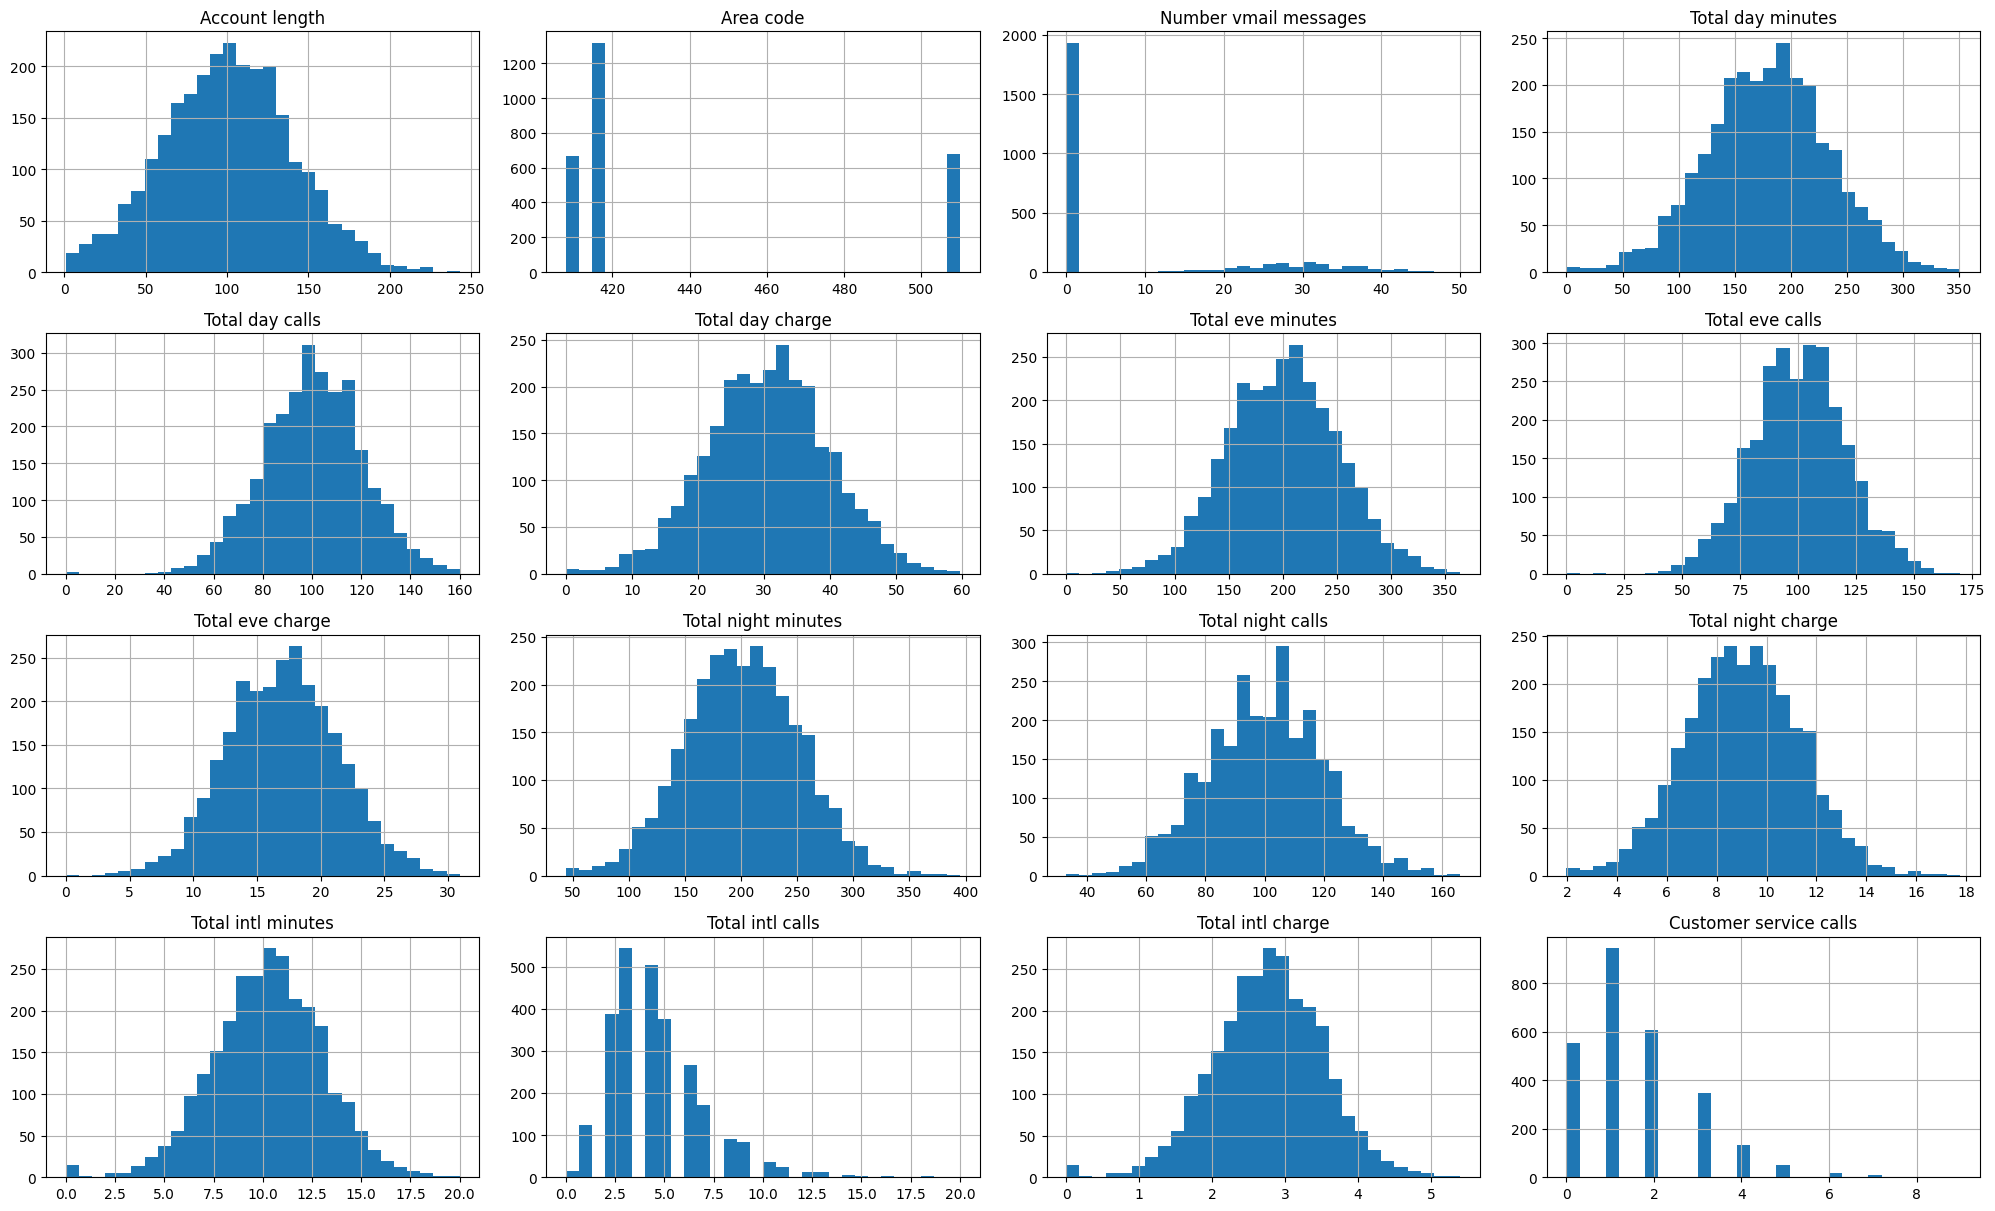

In [65]:
# Plot distributions of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(20, 15), bins=30, layout=(5, 4))
plt.tight_layout()
plt.show()

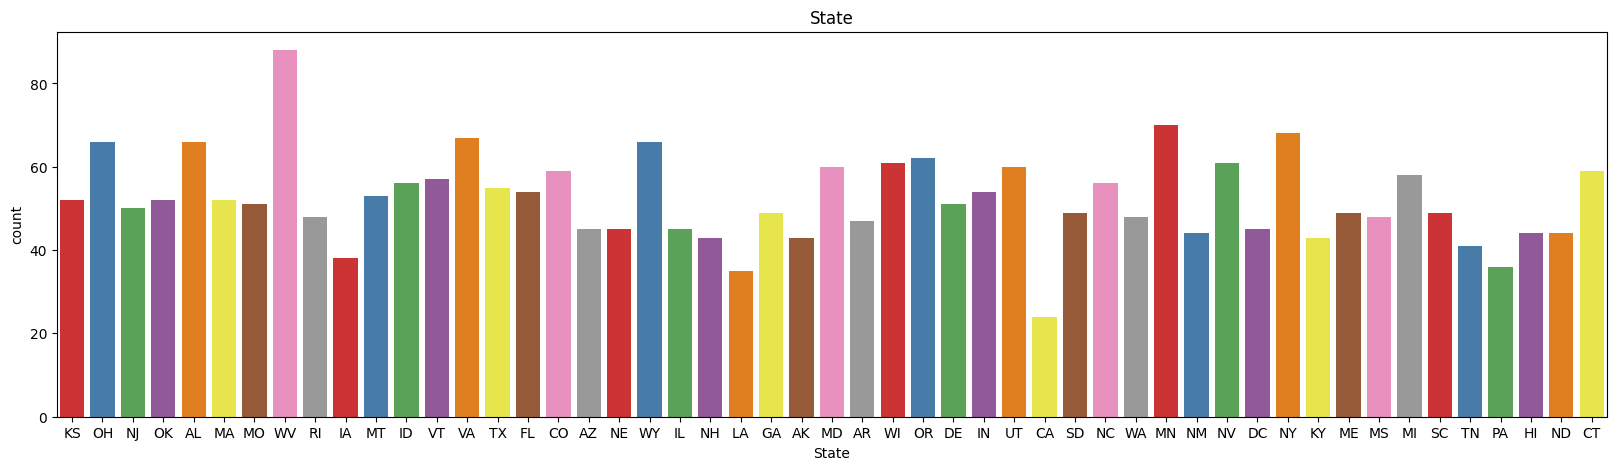

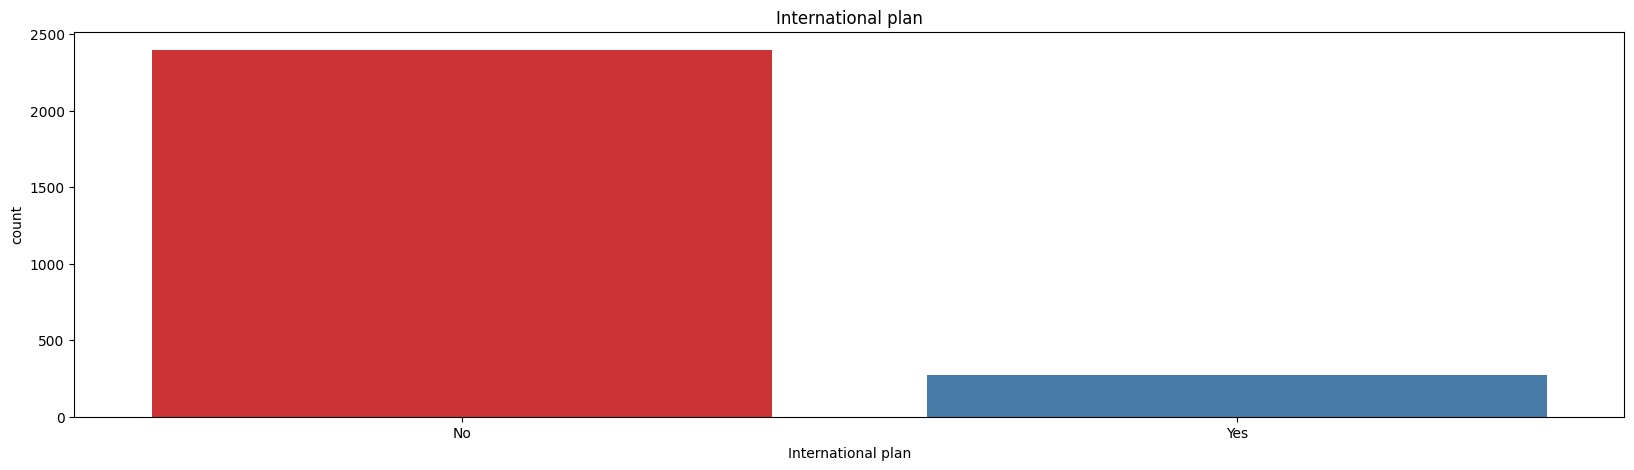

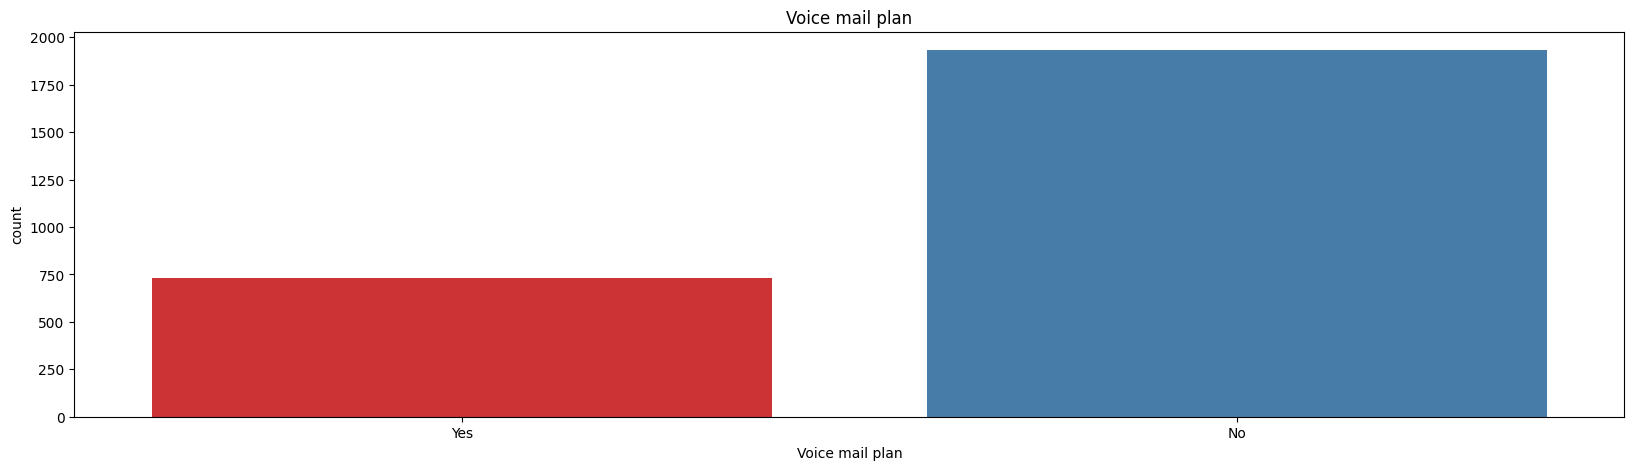

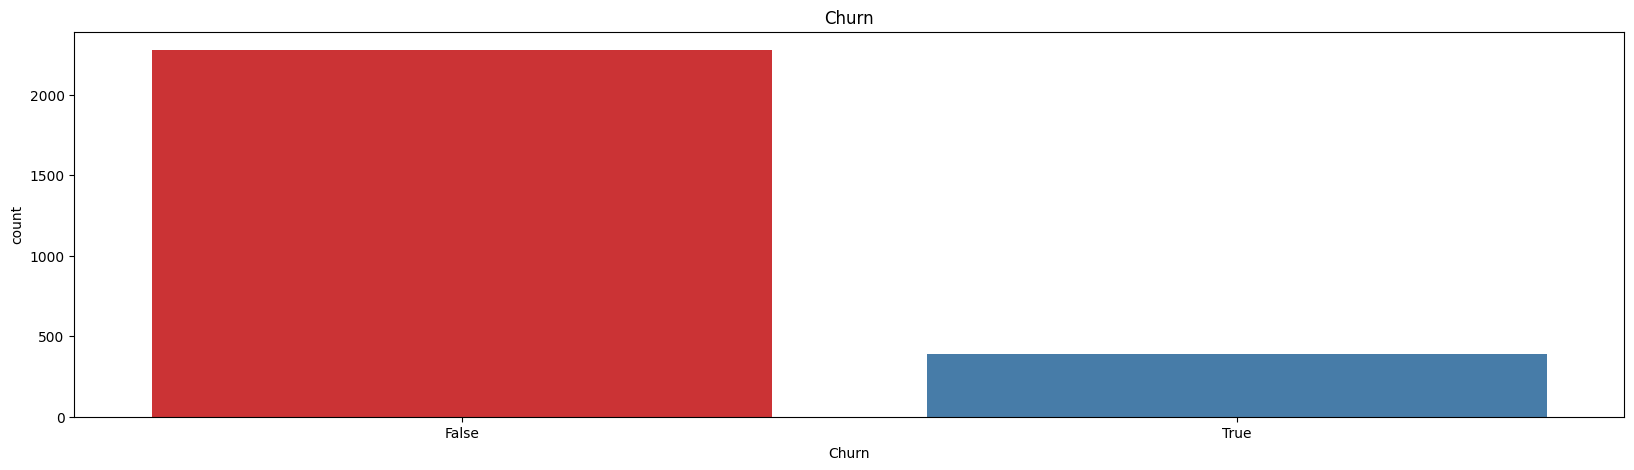

In [66]:
for col in df.select_dtypes(include=['object','bool']).columns:
  plt.figure(figsize=(20, 5))
  sns.countplot(x=col,data=df,palette='Set1')
  plt.title(f"{col}")
  plt.show()

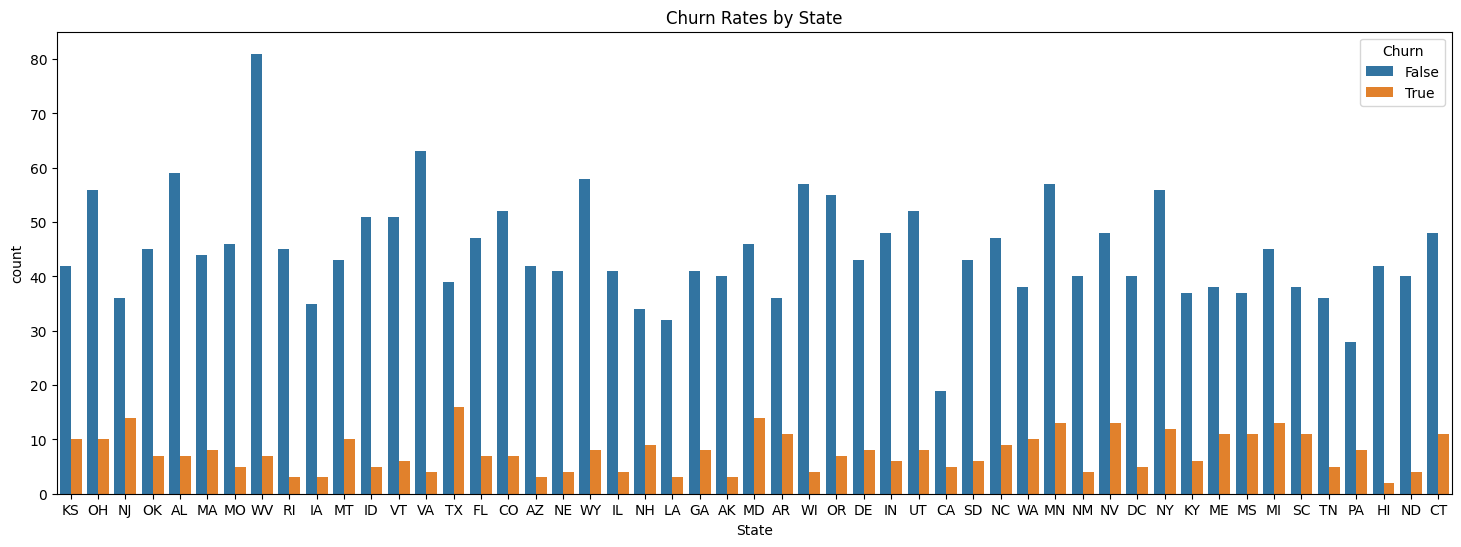

In [67]:
plt.figure(figsize=(18,6))
sns.countplot(x='State',hue='Churn',data=df)
plt.title('Churn Rates by State')
plt.xlabel('State')
plt.ylabel('count')
plt.show()

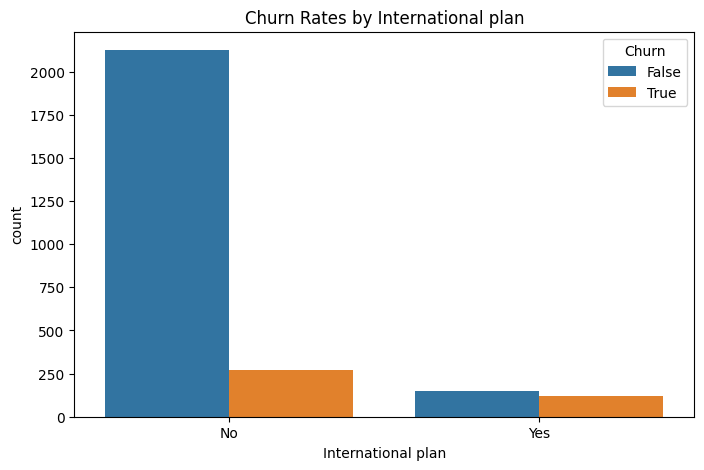

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x='International plan',hue='Churn',data=df)
plt.title('Churn Rates by International plan')
plt.xlabel('International plan')
plt.ylabel('count')
plt.show()

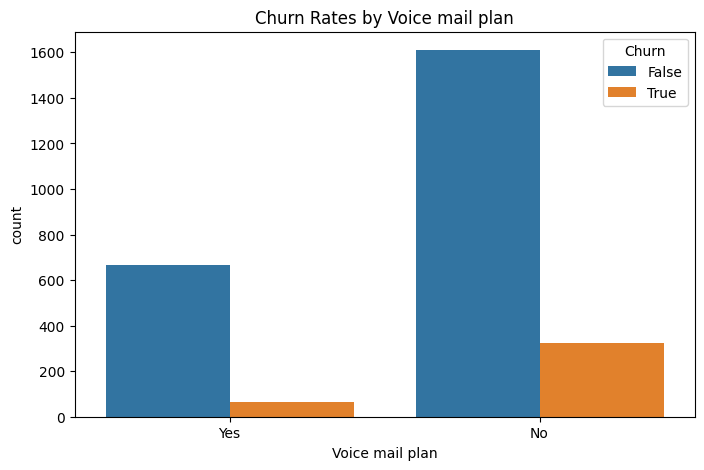

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(x='Voice mail plan',hue='Churn',data=df)
plt.title('Churn Rates by Voice mail plan')
plt.xlabel('Voice mail plan')
plt.ylabel('count')
plt.show()

In [70]:
#sns.pairplot(df,hue='Churn')
#plt.show()

# Data Preprocessing

In [71]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
le = LabelEncoder()

In [72]:
df['International plan'] = le.fit_transform(df['International plan'])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df['Churn'] = le.fit_transform(df['Churn'])

In [73]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [76]:
encoder = OneHotEncoder(drop='first', sparse=False)

In [77]:
encoded_states = encoder.fit_transform(df[['State']])

In [78]:
encoded_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['State']))

In [79]:
df = pd.concat([df.drop(columns=['State']), encoded_df], axis=1)

In [80]:
df.sample(5)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
1227,56,415,0,0,0,137.2,111,23.32,165.9,119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,117,408,0,0,0,102.3,100,17.39,135.2,104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,147,415,1,0,0,157.0,79,26.69,103.1,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
632,134,408,0,0,0,208.3,86,35.41,253.6,89,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
802,182,415,0,0,0,104.9,111,17.83,198.5,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df['Churn'].value_counts()

Churn
0    2278
1     388
Name: count, dtype: int64

imbalanced value

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score,confusion_matrix,classification_report

In [90]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [91]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train

array([[-0.00976397, -0.5257494 , -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       [ 0.75275587, -0.5257494 , -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       [-0.77228381, -0.69071899, -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       ...,
       [-1.28063037, -0.69071899, -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       [-0.23851993, -0.69071899, -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       [ 1.79486631, -0.5257494 , -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505]])

In [92]:
x_test = sc.transform(x_test)
x_test

array([[ 0.80359052, -0.5257494 , -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       [-0.18768527, -0.69071899, -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       [ 0.87984251,  1.71312371, -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       ...,
       [ 0.82900785, -0.69071899, -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       [ 0.04107068, -0.69071899, -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505],
       [-0.6706145 , -0.69071899, -0.33576013, ..., -0.15496893,
        -0.1882926 , -0.15176505]])

# model Selection

In [93]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8663227016885553

In [94]:
lr_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       465
           1       0.50      0.26      0.34        69

    accuracy                           0.87       534
   macro avg       0.70      0.61      0.64       534
weighted avg       0.85      0.87      0.85       534



# Random forest classifier

In [96]:
random = RandomForestClassifier()
random.fit(x_train,y_train)
random.score(x_train, y_train)

0.9995309568480301

In [97]:
random_pred = random.predict(x_test)
accuracy = accuracy_score(y_test, random_pred)
print("Random Forest Classification Report:")
print(classification_report(y_test, random_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       465
           1       1.00      0.54      0.70        69

    accuracy                           0.94       534
   macro avg       0.97      0.77      0.83       534
weighted avg       0.94      0.94      0.93       534



# Gradient Boosting Classification

In [98]:
gbq = GradientBoostingClassifier()
gbq.fit(x_train,y_train)
gbq.score(x_train, y_train)

0.975609756097561

In [99]:
gbq_pred = gbq.predict(x_test)
accuracy = accuracy_score(y_test, gbq_pred)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gbq_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       465
           1       0.91      0.71      0.80        69

    accuracy                           0.95       534
   macro avg       0.93      0.85      0.89       534
weighted avg       0.95      0.95      0.95       534



# here we can see. i performing 3 model accuracy not coming good right.beacuse our terget columns imbalanced.lets makes balanced

In [100]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

In [101]:
y_smote.value_counts()

Churn
0    2278
1    2278
Name: count, dtype: int64

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

# logistics Regression

In [103]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("accuracy training:",lr.score(x_train,y_train))

accuracy training: 0.6909989023051591


In [115]:
lr_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)
print("Classification Report logistic:")
print(classification_report(y_test, lr_pred))

Accuracy: 0.9531835205992509
Classification Report logistic:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       496
           1       0.62      0.75      0.68       416

    accuracy                           0.68       912
   macro avg       0.68      0.68      0.68       912
weighted avg       0.69      0.68      0.68       912



# Random forest classifier

In [105]:
random = RandomForestClassifier()
random.fit(x_train,y_train)
print("accuracy training:",random.score(x_train, y_train))

accuracy training: 1.0


In [116]:
random_pred = random.predict(x_test)
random_accuracy = accuracy_score(y_test, random_pred)
print("Accuracy:", accuracy)
print("Classification Report random forest:")
print(classification_report(y_test, random_pred))

Accuracy: 0.9531835205992509
Classification Report random forest:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       496
           1       0.95      0.93      0.94       416

    accuracy                           0.95       912
   macro avg       0.95      0.94      0.94       912
weighted avg       0.95      0.95      0.95       912



In [107]:
gbq = GradientBoostingClassifier()
gbq.fit(x_train,y_train)
print("accuracy training:",gbq.score(x_train, y_train))

accuracy training: 0.9322173435784852


In [117]:
gbq_pred = gbq.predict(x_test)
gbq_accuracy = accuracy_score(y_test, gbq_pred)
print("Accuracy:", accuracy)
print("Classification Report gradient boosting:")
print(classification_report(y_test, gbq_pred))

Accuracy: 0.9531835205992509
Classification Report gradient boosting:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       496
           1       0.93      0.88      0.90       416

    accuracy                           0.91       912
   macro avg       0.92      0.91      0.91       912
weighted avg       0.92      0.91      0.91       912



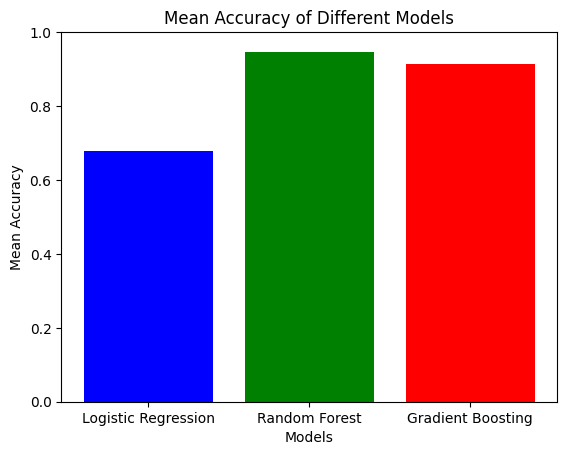

In [109]:
mean_accuracies = [lr_accuracy, random_accuracy, gbq_accuracy]

# Model names
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Plotting the bar graph
plt.bar(model_names, mean_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.ylim(0, 1)
plt.show()

# best model is random forest and Gradient Boosting are both

In [110]:
importances_gb = gbq.feature_importances_

In [113]:
feature_importances_gb = pd.Series(importances_gb, index=x.columns)
feature_importances_gb = feature_importances_gb.sort_values(ascending=False).head(10)

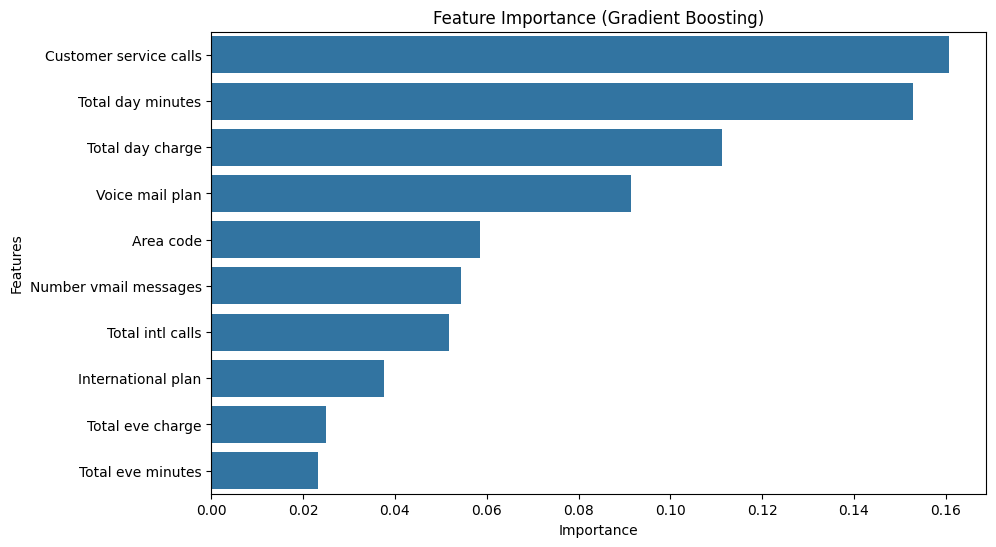

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_gb, y=feature_importances_gb.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()

#Conclusion

After applying SMOTE to address the class imbalance, the following conclusions can be drawn from the model evaluations:

Random Forest:

Accuracy: 95%

Performance: This model achieved the highest accuracy and demonstrated exceptional precision and recall for both classes. It effectively handled the class imbalance and provided the most reliable predictions.
Gradient Boosting:

Accuracy: 91%

Performance: Gradient Boosting also performed well, with strong precision and recall scores. While slightly less accurate than Random Forest, it still showed robust performance and was effective in handling the imbalanced data.
Logistic Regression:

Accuracy: 68%

Performance: Logistic Regression showed balanced precision and recall but significantly lower accuracy compared to the other models. It was less effective in managing the imbalanced dataset.

Key Insights:

1. Random Forest emerged as the top-performing model, providing the best balance of accuracy and class-specific metrics.

2. Gradient Boosting offered solid performance, though not as strong as Random Forest.

3. Logistic Regression struggled with lower accuracy, highlighting its limitations in this context.